# Start here

Run this notebook in your browser using [Binder](https://mybinder.org/v2/gh/flexcompute-readthedocs/tidy3d-docs/readthedocs?labpath=docs%2Fsource%2Fnotebooks%2FStartHere.ipynb).

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


[16:39:54] INFO     Using client version: 1.8.0                               ]8;id=780626;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py\__init__.py]8;;\:]8;id=740434;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py#112\112]8;;\

In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [3]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


           INFO     Auto meshing using wavelength 1.0000 defined from        ]8;id=725212;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=42087;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py#510\510]8;;\
                    sources.                                                                 

simulation grid is shaped [192, 192, 192] for 7 million cells.


In [4]:
# run the simulation, download the data.
data = web.run(sim, task_name="quickstart", path="data/data.hdf5")


           INFO     Using Tidy3D credentials from stored file.                     ]8;id=68048;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py\auth.py]8;;\:]8;id=775585;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py#70\70]8;;\

[16:39:56] INFO     Authentication successful.                                     ]8;id=380212;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py\auth.py]8;;\:]8;id=974420;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py#30\30]8;;\

           INFO     Created task 'quickstart' with task_id                      ]8;id=380566;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=77300;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#120\120]8;;\
                    '74b93d81-6ec2-4e35-b425-32443361cc52'.                                  

Output()

[16:39:57] INFO     status = queued                                             ]8;id=58688;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=326224;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#257\257]8;;\

Output()

[16:40:00] INFO     Maximum flex unit cost: 0.03                                ]8;id=518926;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=209337;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#248\248]8;;\

[16:40:03] INFO     status = preprocess                                         ]8;id=51023;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=764291;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#269\269]8;;\

[16:40:06] INFO     starting up solver                                          ]8;id=771392;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=947486;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#273\273]8;;\

[16:40:16] INFO     running solver                                              ]8;id=56962;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=278110;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#279\279]8;;\

Output()

[16:40:54] INFO     early shutoff detected, exiting.                            ]8;id=875298;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=534896;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#290\290]8;;\

           INFO     status = postprocess                                        ]8;id=466398;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=752127;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#296\296]8;;\

Output()

[16:40:56] INFO     status = success                                            ]8;id=586058;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=563577;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#302\302]8;;\

           INFO     downloading file "output/monitor_data.hdf5" to              ]8;id=367362;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=256852;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#585\585]8;;\
                    "data/data.hdf5"                                                         

Output()

[16:40:57] INFO     loading SimulationData from data/data.hdf5                  ]8;id=472634;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=759137;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#407\407]8;;\

In [5]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0318
Compute monitor modes time (s):    0.0020
Rest of setup time (s):            2.3202

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.23e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.37e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.90e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.30e-03
- Time

[16:40:58] INFO     Auto meshing using wavelength 1.0000 defined from        ]8;id=79597;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=968740;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py#510\510]8;;\
                    sources.                                                                 

<Figure size 432x288 with 2 Axes>

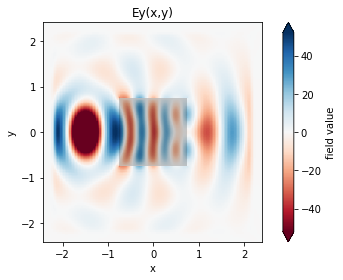

In [6]:
# plot the fields stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)
_ = ax.set_title("Ey(x,y)")
